In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import loader
import plot
import helpers
import importlib
importlib.reload(loader)
importlib.reload(plot)
importlib.reload(helpers)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import AdaBoostClassifier

In [3]:
data = loader.load_cancer_data()

In [4]:
data.groupby('target').count()

,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,symmetry mean,fractal dimension mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worst,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
target,,,,,,,,,,,,,,,,,,,,,
0,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
1,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [5]:
data.head()

,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,symmetry mean,fractal dimension mean,...,texture worst,perimeter worst,area worst,smoothness worst,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [6]:
features = [col for col in data.columns if col != "target"]
X = data[features]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [7]:
# Normalize input data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [6]:
basic_param_grid=dict(metric=['euclidean'])
clf = KNeighborsClassifier()
basic_grid = GridSearchCV(estimator=clf, param_grid=basic_param_grid, return_train_score=True)
basic_grid_result = basic_grid.fit(X_train_norm, y_train)
basic_res = basic_grid_result.cv_results_
basic_res_df = helpers.scikit_cv_result_to_df(basic_res)
basic_res_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
metric,,,,,,,,,
euclidean,0.001885,0.000356,0.010451,0.001416,0.969778,0.023529,1,0.978011,0.003993


In [7]:
basic_res_df[helpers.get_useful_cv_columns()]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score
metric,,,,
euclidean,0.001885,0.010451,0.969778,0.978011


In [8]:
basic = KNeighborsClassifier()
n_neighbors = range(2,11)
metric = ['manhattan', 'euclidean']
param_grid = dict(metric=metric, n_neighbors=n_neighbors)
grid = GridSearchCV(estimator=basic, param_grid=param_grid, return_train_score=True)
grid_result = grid.fit(X_train_norm, y_train)

In [9]:
res = grid_result.cv_results_
res_df = helpers.scikit_cv_result_to_df(res)
res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  \
metric    n_neighbors                                                 
manhattan 3                 0.001579      0.000144         0.009956   
euclidean 3                 0.001756      0.000047         0.008886   
          5                 0.001731      0.000082         0.008782   
manhattan 5                 0.001591      0.000062         0.010387   
          7                 0.001589      0.000050         0.009960   
euclidean 6                 0.001695      0.000111         0.009064   
manhattan 10                0.001650      0.000108         0.010351   
          8                 0.001633      0.000105         0.010164   
euclidean 2                 0.001677      0.000158         0.009179   
          4                 0.001670      0.000110         0.009360   
          7                 0.001691      0.000095         0.009338   
          9                 0.001637      0.000122         0.009157   
manhattan 6                 0.001621      0.000080         0.010324   
euclidean 8                 0.001714      0.000138         0.009412   
          10                0.001721      0.000088         0.009006   
manhattan 2                 0.001653      0.000097         0.009791   
          4                 0.001740      0.000216         0.010648   
          9                 0.001625      0.000136         0.010298   

                       std_score_time  mean_test_score  std_test_score  \
metric    n_neighbors                                                    
manhattan 3                  0.000284         0.972310        0.018647   
euclidean 3                  0.000213         0.969810        0.018954   
          5                  0.000185         0.969778        0.023529   
manhattan 5                  0.000237         0.964778        0.014834   
          7                  0.000163         0.959715        0.018721   
euclidean 6                  0.000251         0.959715        0.031486   
manhattan 10                 0.000220         0.959684        0.025899   
          8                  0.000191         0.959684        0.025899   
euclidean 2                  0.000422         0.959684        0.037946   
          4                  0.000592         0.959684        0.031484   
          7                  0.000258         0.957215        0.030659   
          9                  0.000453         0.957215        0.030659   
manhattan 6                  0.000293         0.957184        0.023594   
euclidean 8                  0.000592         0.954715        0.030636   
          10                 0.000288         0.954715        0.030636   
manhattan 2                  0.000133         0.954684        0.030628   
          4                  0.001057         0.954684        0.022194   
          9                  0.000312         0.954684        0.023560   

                       rank_test_score  mean_train_score  std_train_score  
metric    n_neighbors                                                      
manhattan 3                          1          0.984921         0.002370  
euclidean 3                          2          0.986179         0.005113  
          5                          3          0.978011         0.003993  
manhattan 5                          4          0.977384         0.007284  
          7                          5          0.971105         0.005034  
euclidean 6                          5          0.968591         0.003986  
manhattan 10                         7          0.961050         0.006503  
          8                          7          0.965452         0.005253  
euclidean 2                          7          0.978636         0.006429  
          4                          7          0.971099         0.004655  
          7                         11          0.973618         0.004257  
          9                         11          0.970472         0.004736  
manhattan 6                         13          0.965444 

In [10]:
res_df.sort_values(by='rank_test_score')[helpers.get_useful_cv_columns()]

mean_fit_time  mean_score_time  mean_test_score  \
metric    n_neighbors                                                    
manhattan 3                 0.001579         0.009956         0.972310   
euclidean 3                 0.001756         0.008886         0.969810   
          5                 0.001731         0.008782         0.969778   
manhattan 5                 0.001591         0.010387         0.964778   
          7                 0.001589         0.009960         0.959715   
euclidean 6                 0.001695         0.009064         0.959715   
manhattan 10                0.001650         0.010351         0.959684   
          8                 0.001633         0.010164         0.959684   
euclidean 2                 0.001677         0.009179         0.959684   
          4                 0.001670         0.009360         0.959684   
          7                 0.001691         0.009338         0.957215   
          9                 0.001637         0.009157         0.957215   
manhattan 6                 0.001621         0.010324         0.957184   
euclidean 8                 0.001714         0.009412         0.954715   
          10                0.001721         0.009006         0.954715   
manhattan 2                 0.001653         0.009791         0.954684   
          4                 0.001740         0.010648         0.954684   
          9                 0.001625         0.010298         0.954684   

                       mean_train_score  
metric    n_neighbors                    
manhattan 3                    0.984921  
euclidean 3                    0.986179  
          5                    0.978011  
manhattan 5                    0.977384  
          7                    0.971105  
euclidean 6                    0.968591  
manhattan 10                   0.961050  
          8                    0.965452  
euclidean 2                    0.978636  
          4                    0.971099  
          7                    0.973618  
          9                    0.970472  
manhattan 6                    0.965444  
euclidean 8                    0.965450  
          10                   0.961050  
manhattan 2                    0.976755  
          4                    0.974237  
          9                    0.966704

In [11]:
manhattan = res_df.xs('manhattan', level='metric')
euclidean = res_df.xs('euclidean', level='metric')

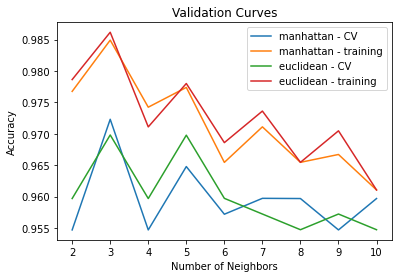

In [12]:
plt.plot(n_neighbors, manhattan['mean_test_score'], label='manhattan - CV')
plt.plot(n_neighbors, manhattan['mean_train_score'],  label='manhattan - training')
plt.plot(n_neighbors, euclidean['mean_test_score'], label='euclidean - CV')
plt.plot(n_neighbors, euclidean['mean_train_score'], label='euclidean - training')
plt.legend(loc='best')
plt.title('Validation Curves')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.show()

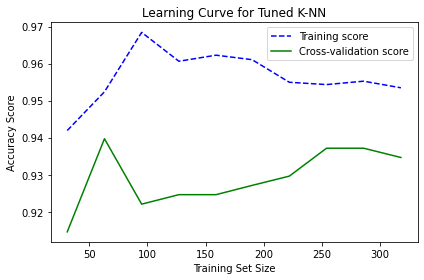

In [8]:
best_model = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
plot.plot_learning_curve(best_model, X_train, y_train, title='Learning Curve for Tuned K-NN')

In [14]:
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9473684210526315

In [15]:
basic = KNeighborsClassifier()
n_neighbors = range(2,11)
weights = ['uniform', 'distance']
param_grid = dict(weights=weights, n_neighbors=n_neighbors)
grid = GridSearchCV(estimator=basic, param_grid=param_grid, return_train_score=True)
grid_result = grid.fit(X_train_norm, y_train)

In [16]:
res = grid_result.cv_results_
res_df = helpers.scikit_cv_result_to_df(res)
res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  \
n_neighbors weights                                                  
3           uniform        0.001866      0.000112         0.011130   
            distance       0.001790      0.000090         0.003471   
5           uniform        0.001783      0.000097         0.010656   
            distance       0.001734      0.000032         0.003506   
4           distance       0.001699      0.000047         0.003453   
2           distance       0.001836      0.000104         0.003294   
8           distance       0.001799      0.000130         0.003665   
6           distance       0.001866      0.000116         0.003760   
10          distance       0.001728      0.000051         0.003542   
9           distance       0.001792      0.000140         0.003525   
7           distance       0.001815      0.000106         0.003652   
6           uniform        0.001840      0.000034         0.011396   
4           uniform        0.001782      0.000022         0.010692   
2           uniform        0.001925      0.000242         0.012336   
9           uniform        0.001797      0.000064         0.010953   
7           uniform        0.001998      0.000198         0.011096   
8           uniform        0.001818      0.000021         0.010889   
10          uniform        0.001792      0.000091         0.010723   

                      std_score_time  mean_test_score  std_test_score  \
n_neighbors weights                                                     
3           uniform         0.000436         0.969810        0.018954   
            distance        0.000216         0.969810        0.018954   
5           uniform         0.000244         0.969778        0.023529   
            distance        0.000260         0.969778        0.023529   
4           distance        0.000091         0.967278        0.023506   
2           distance        0.000181         0.964747        0.021830   
8           distance        0.000067         0.964715        0.033455   
6           distance        0.000159         0.964715        0.033455   
10          distance        0.000070         0.962215        0.032098   
9           distance        0.000119         0.959715        0.031486   
7           distance        0.000159         0.959715        0.031486   
6           uniform         0.000647         0.959715        0.031486   
4           uniform         0.000469         0.959684        0.031484   
2           uniform         0.003042         0.959684        0.037946   
9           uniform         0.000549         0.957215        0.030659   
7           uniform         0.000248         0.957215        0.030659   
8           uniform         0.000209         0.954715        0.030636   
10          uniform         0.000416         0.954715        0.030636   

                      rank_test_score  mean_train_score  std_train_score  
n_neighbors weights                                                       
3           uniform                 1          0.986179         0.005113  
            distance                1          1.000000         0.000000  
5           uniform                 3          0.978011         0.003993  
            distance                3          1.000000         0.000000  
4           distance                5          1.000000         0.000000  
2           distance                6          1.000000         0.000000  
8           distance                7          1.000000         0.000000  
6           distance                7          1.000000         0.000000  
10          distance                9          1.000000         0.000000  
9           distance               10          1.000000         0.000000  
7           distance               10          1.000000         0.000000  
6           uniform                10          0.968591         0.003986  
4           uniform                13          0.971099         0.004655  
2           uniform                

In [21]:
res_df.sort_values(by='mean_score_time')

,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
n_neighbors,weights,,,,,,,,,
2,distance,0.001836,0.000104,0.003294,0.000181,0.964747,0.021830,6,1.000000,0.000000
4,distance,0.001699,0.000047,0.003453,0.000091,0.967278,0.023506,5,1.000000,0.000000
3,distance,0.001790,0.000090,0.003471,0.000216,0.969810,0.018954,1,1.000000,0.000000
5,distance,0.001734,0.000032,0.003506,0.000260,0.969778,0.023529,3,1.000000,0.000000
9,distance,0.001792,0.000140,0.003525,0.000119,0.959715,0.031486,10,1.000000,0.000000
10,distance,0.001728,0.000051,0.003542,0.000070,0.962215,0.032098,9,1.000000,0.000000
7,distance,0.001815,0.000106,0.003652,0.000159,0.959715,0.031486,10,1.000000,0.000000
8,distance,0.001799,0.000130,0.003665,0.000067,0.964715,0.033455,7,1.000000,0.000000
6,distance,0.001866,0.000116,0.003760,0.000159,0.964715,0.033455,7,1.000000,0.000000


In [17]:
uniform = res_df.xs('uniform', level='weights')
distance = res_df.xs('distance', level='weights')

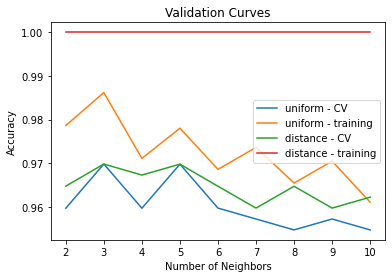

In [18]:
plt.plot(n_neighbors, uniform['mean_test_score'], label='uniform - CV')
plt.plot(n_neighbors, uniform['mean_train_score'],  label='uniform - training')
plt.plot(n_neighbors, distance['mean_test_score'], label='distance - CV')
plt.plot(n_neighbors, distance['mean_train_score'], label='distance - training')
plt.legend(loc='best')
plt.title('Validation Curves')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.show()

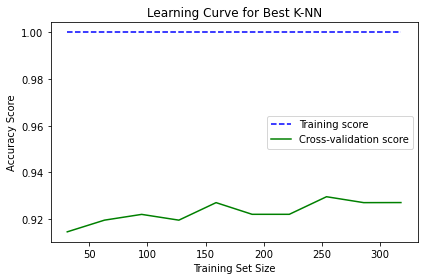

In [19]:
best_model = KNeighborsClassifier(weights='distance', n_neighbors=3)
plot.plot_learning_curve(best_model, X_train, y_train, title='Learning Curve for Best K-NN')

In [20]:
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9415204678362573